**Credit Card Fraud**  is a major issue that is expected to grow by over $10 billion over the next three years. Avoiding credit card fraud is an issue that credit card companies constantly strive to achieve in order to minimize these losses.

From Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3), I found a dataset with 31 features containing 284, 807 transactions. 28 of the features have been anonymized due to confidentiality concerns, and are labeled V1-V28. The other 3 are Time (measured in seconds since first transaction), transaction amount, and class(0 = legitimate, 1 = fraudulent.)

In [2]:
# Reading in data
df = spark.read.format('csv') \
  .option("inferSchema", 'true') \
  .option("header", 'true') \
  .option("sep", ",") \
  .load("/FileStore/tables/creditcard.csv")

# Data Cleaning

Let's run some basic tests to see what kind of data we're dealing with.

In [4]:
# What kind of data are we working with?
df.printSchema()

root
-- Time: decimal(10,0) (nullable = true)
-- V1: double (nullable = true)
-- V2: double (nullable = true)
-- V3: double (nullable = true)
-- V4: double (nullable = true)
-- V5: double (nullable = true)
-- V6: double (nullable = true)
-- V7: double (nullable = true)
-- V8: double (nullable = true)
-- V9: double (nullable = true)
-- V10: double (nullable = true)
-- V11: double (nullable = true)
-- V12: double (nullable = true)
-- V13: double (nullable = true)
-- V14: double (nullable = true)
-- V15: double (nullable = true)
-- V16: double (nullable = true)
-- V17: double (nullable = true)
-- V18: double (nullable = true)
-- V19: double (nullable = true)
-- V20: double (nullable = true)
-- V21: double (nullable = true)
-- V22: double (nullable = true)
-- V23: double (nullable = true)
-- V24: double (nullable = true)
-- V25: double (nullable = true)
-- V26: double (nullable = true)
-- V27: double (nullable = true)
-- V28: double (nullable = true)
-- Amount: double (nullable = true)
-- Class: integer (nullable = true)

In [5]:
# Shape of Dataframe
print("There are {} rows and {} columns.".format(df.count(), len(df.columns)))

There are 284807 rows and 31 columns.

In [6]:
# Lets take a look at the data
display(df.take(10))

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
1.0,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,-0.0549519224713749,-0.226487263835401,0.178228225877303,0.507756869957169,-0.28792374549456,-0.631418117709045,-1.0596472454325,-0.684092786345479,1.96577500349538,-1.2326219700892,-0.208037781160366,-0.108300452035545,0.00527359678253453,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0
2.0,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,0.753074431976354,-0.822842877946363,0.53819555014995,1.3458515932154,-1.11966983471731,0.175121130008994,-0.451449182813529,-0.237033239362776,-0.0381947870352842,0.803486924960175,0.408542360392758,-0.00943069713232919,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0
2.0,-0.425965884412454,0.960523044882985,1.14110934232219,-0.168252079760302,0.42098688077219,-0.0297275516639742,0.476200948720027,0.260314333074874,-0.56867137571251,-0.371407196834471,1.34126198001957,0.359893837038039,-0.358090652573631,-0.137133700217612,0.517616806555742,0.401725895589603,-0.0581328233640131,0.0686531494425432,-0.0331937877876282,0.0849676720682049,-0.208253514656728,-0.559824796253248,-0.0263976679795373,-0.371426583174346,-0.232793816737034,0.105914779097957,0.253844224739337,0.0810802569229443,3.67,0
4.0,1.22965763450793,0.141003507049326,0.0453707735899449,1.20261273673594,0.191880988597645,0.272708122899098,-0.00515900288250983,0.0812129398830894,0.464959994783886,-0.0992543211289237,-1.41690724314928,-0.153825826253651,-0.75106271556262,0.16737196252175,0.0501435942254188,-0.443586797916727,0.00282051247234708,-0.61198733994012,-0.0455750446637976,-0.21963255278686,-0.167716265815783,-0.270709726172363,-0.154103786809305,-0.780055415004671,0.75013693580659,-0.257236845917139,0.0345074297438413,0.00516776890624916,4.99,0
7.0,-0.644269442348146,1.41796354547385,1.0743803763556,-0.492199018495015,0.948934094764157,0.428118462833089,1.12063135838353,-3.80786423873589,0.615374730667027,1.24937617815176,

In [7]:
# Are there any missing values?
orig = df
df.dropna()
print("There are {} missing values".format(orig.count() - df.count()))

There are 0 missing values

In [8]:
# Let's take a look at each feature's correlational value in relation to class
new_df = df.toPandas()
corr_matrix= new_df.corr()
abs(corr_matrix["Class"].sort_values(ascending=True))

Out[ 29 ]: 
V17 0.326481
V14 0.302544
V12 0.260593
V10 0.216883
V16 0.196539
V3 0.192961
V7 0.187257
V18 0.111485
V1 0.101347
V9 0.097733
V5 0.094974
V6 0.043643
V24 0.007221
V13 0.004570
V15 0.004223
V23 0.002685
V22 0.000805
V25 0.003308
V26 0.004455
Amount 0.005632
V28 0.009536
V27 0.017580
V8 0.019875
V20 0.020090
V19 0.034783
V21 0.040413
V2 0.091289
V4 0.133447
V11 0.154876
Class 1.000000
Name: Class, dtype: float64

# Data Analysis
The data set contains 284,807 transactions. However, the mean value for all transactions is $88.35 while the largest transaction is $25,691.16. This is an issue since this indicates there is a heavy rightwards skew in the data.

On the other hand, time is recorded in seconds since the first transaction. There is a sudden drop in the data at one point before rising again, most likely due to it being night time and less transactions occurring.

Lastly, there is a large imbalance between legitimate and fraudulent transactions. This will be an issue because any models used will have an artificially inflated success rate since there is a much higher chance for the result to be a legitimate transaction.

In [10]:
df.createOrReplaceTempView("fraud")

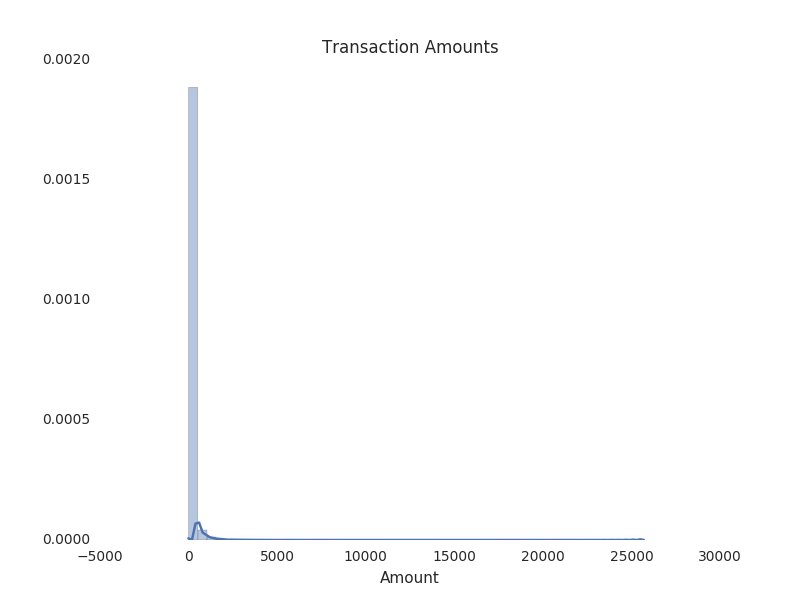

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll be using pandas to graph time and amount
plt.figure(figsize=(8,6))
plt.title('Transaction Amounts')
sns.distplot(new_df['Amount'])
display()

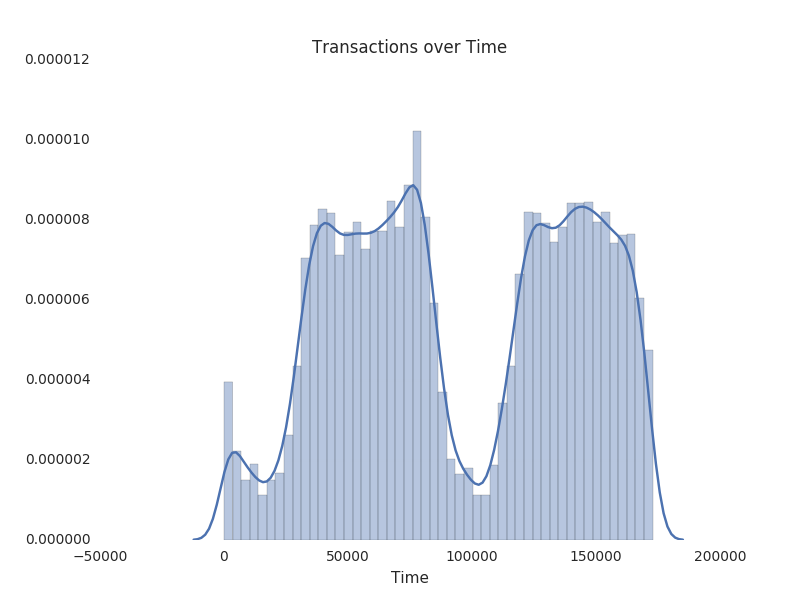

In [12]:
new_df = df.toPandas()
new_df['Time'] =new_df['Time'].astype(int)
 
plt.figure(figsize=(8,6))
plt.title('Transactions over Time')
sns.distplot(new_df['Time'])
display()

In [13]:
%sql

select class, count(0) from fraud group by class

class,count(0)
1,492
0,284315


# Combining Features
Since the features have been transformed as a result of PCA, it may be useful to combine them into a single column using vector assembly to simplify later methods.

In [15]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
new_df = df.withColumnRenamed("Class","label")

features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26','V27', 'V28', 'Amount']

assembler = VectorAssembler(
    inputCols= features,
    outputCol= "features")
output = assembler.transform(new_df)
display(output.select("features", "label").head(10))

features,label
"List(1, 30, List(), List(0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62))",0
"List(1, 30, List(), List(0.0, 1.19185711131486, 0.26615071205963, 0.16648011335321, 0.448154078460911, 0.0600176492822243, -0.0823608088155687, -0.0788029833323113, 0.0851016549148104, -0.255425128109186, -0.166974414004614, 1.61272666105479, 1.06523531137287, 0.48909501589608, -0.143772296441519, 0.635558093258208, 0.463917041022171, -0.114804663102346, -0.183361270123994, -0.145783041325259, -0.0690831352230203, -0.225775248033138, -0.638671952771851, 0.101288021253234, -0.339846475529127, 0.167170404418143, 0.125894532368176, -0.00898309914322813, 0.0147241691924927, 2.69))",0
"List(1, 30, List(), List(1.0, -1.35835406159823, -1.34016307473609, 1.77320934263119, 0.379779593034328, -0.503198133318193, 1.80049938079263, 0.791460956450422, 0.247675786588991, -1.51465432260583, 0.207642865216696, 0.624501459424895, 0.066083685268831, 0.717292731410831, -0.165945922763554, 2.34586494901581, -2.89008319444231, 1.10996937869599, -0.121359313195888, -2.26185709530414, 0.524979725224404, 0.247998153469754, 0.771679401917229, 0.909412262347719, -0.689280956490685, -0.327641833735251, -0.139096571514147, -0.0553527940384261, -0.0597518405929204, 378.66))",0
"List(1, 30, List(), List(1.0, -0.966271711572087, -0.185226008082898, 1.79299333957872, -0.863291275036453, -0.0103088796030823, 1.24720316752486, 0.23760893977178, 0.377435874652262, -1.38702406270197, -0.0549519224713749, -0.226487263835401, 0.178228225877303, 0.507756869957169, -0.28792374549456, -0.631418117709045, -1.0596472454325, -0.684092786345479, 1.96577500349538, -1.2326219700892, -0.208037781160366, -0.108300452035545, 0.00527359678253453, -0.190320518742841, -1.17557533186321, 0.647376034602038, -0.221928844458407, 0.0627228487293033, 0.0614576285006353, 123.5))",0
"List(1, 30, List(), List(2.0, -1.15823309349523, 0.877736754848451, 1.548717846511, 0.403033933955121, -0.407193377311653, 0.0959214624684256, 0.592940745385545, -0.270532677192282, 0.817739308235294, 0.753074431976354, -0.822842877946363, 0.53819555014995, 1.3458515932154, -1.11966983471731, 0.175121130008994, -0.451449182813529, -0.237033239362776, -0.0381947870352842, 0.803486924960175, 0.408542360392758, -0.00943069713232919, 0.79827849458971, -0.137458079619063, 0.141266983824769, -0.206009587619756, 0.502292224181569, 0.219422229513348, 0.215153147499206, 69.99))",0
"List(1, 30, List(), List(2.0, -0.425965884412454, 0.960523044882985, 1.14110934232219, -0.168252079760302, 0.42098688077219, -0.0297275516639742, 0.476200948720027, 0.260314333074874, -0.56867137571251, -0.371407196834471, 1.34126198001957, 0.359893837038039, -0.358090652573631, -0.137133700217612, 0.517616806555742, 0.401725895589603, -0.0581328233640131, 0.0686531494425432, -0.0331937877876282, 0.0849676720682049, -0.208253514656728, -0.559824796253248, -0.0263976679795373, -0.371426583174346, -0.232793816737034, 0.105914779097957, 0.253844224739337, 0.0810802569229443, 3.67))",0
"List(1, 30, List(), List(4.0, 1.22965763450793, 0.141003507049326, 0.0453707735899449, 1.20261273673594, 0.191880988597645, 0.272708122899098, -0.00515900288250983, 0.0812129398830894, 0.464959994783886, -0.0992543211289237, -1.41690724314928, -0.153825826253651, -0.75106271556262, 0.16737196252175, 0.0501435942254188, -0.443586797916727, 0.00282051247234708, -0.61198733994012, -0.0455750446637976, -0.21963255278686, -0.167716265815783, -0.270709726172363, -0.1541037

# Scaling Data
Since features V1-V28 have been scaled using PCA, not scaling the remaining two features, Time and Amount, can result in imbalances in the data. Thus, we will scale the remaining features using StandardScaler.

In [17]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(output)

# Normalize each feature to have unit standard deviation.
scaledData = scalerModel.transform(output)
scaledData.show()


+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+--------------------+--------------------+
Time| V1| V2| V3| V4| V5| V6| V7| V8| V9| V10| V11| V12| V13| V14| V15| V16| V17| V18| V19| V20| V21| V22| V23| V24| V25| V26| V27| V28|Amount|label| features| scaledFeatures|
+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+--------------------+--------------------+
 0| -1.3598071336738|-0.0727811733098497| 2.53634673796914| 1.37815522427443| -0.338320769942518| 0.462387777762292| 0.239598554061257| 0.0986979012610507| 0.363786969611213| 0.0907941719789316|-0.551599533260813|-0.617800855762348| -0.991389847235408| -0.311169353699879| 1.46817697209427| -0.470400525259478| 0.207971241929242| 0.0257905801985591| 0.403992960255733| 0.251412098239705| -0.018306777944153| 0.277837575558899| -0.110473910188767| 0.0669280749146731| 0.128539358273528| -0.189114843888824| 0.133558376740387|-0.0210530534538215|149.62| 0|[0.0,-1.359807133...|[0.0,-0.694241102...|
 0| 1.19185711131486| 0.26615071205963| 0.16648011335321| 0.448154078460911| 0.0600176492822243|-0.0823608088155687| -0.0788029833323113| 0.0851016549148104|-0.255425128109186| -0.166974414004614| 1.61272666105479| 1.06523531137287| 0.48909501589608| -0.143772296441519| 0.635558093258208| 0.463917041022171| -0.114804663102346| -0.183361270123994| -0.145783041325259|-0.0690831352230203| -0.225775248033138| -0.638671952771851| 0.101288021253234| -0.339846475529127| 0.167170404418143| 0.125894532368176|-0.00898309914322813| 0.0147241691924927| 2.69| 0|[0.0,1.1918571113...|[0.0,0.6084952594...|
 1| -1.35835406159823| -1.34016307473609| 1.77320934263119| 0.379779593034328| -0.503198133318193| 1.80049938079263| 0.791460956450422| 0.247675786588991| -1.51465432260583| 0.207642865216696| 0.624501459424895| 0.066083685268831| 0.717292731410831| -0.165945922763554| 2.34586494901581| -2.89008319444231| 1.10996937869599| -0.121359313195888| -2.26185709530414| 0.524979725224404| 0.247998153469754| 0.771679401917229| 0.909412262347719| -0.689280956490685| -0.327641833735251| -0.139096571514147| -0.0553527940384261|-0.0597518405929204|378.66| 0|[1.0,-1.358354061...|[2.10578867609768...|
 1|-0.966271711572087| -0.185226008082898| 1.79299333957872| -0.863291275036453|-0.0103088796030823| 1.24720316752486| 0.23760893977178| 0.377435874652262| -1.38702406270197|-0.0549519224713749|-0.226487263835401| 0.178228225877303| 0.507756869957169| -0.28792374549456| -0.631418117709045| -1.0596472454325| -0.684092786345479| 1.96577500349538| -1.2326219700892| -0.208037781160366| -0.108300452035545|0.00527359678253453| -0.190320518742841| -1.17557533186321| 0.647376034602038| -0.221928844458407| 0.0627228487293033| 0.0614576285006353| 123.5| 0|[1.0,-0.966271711...|[2.10578867609768...|
 2| -1.15823309349523| 0.877736754848451| 1.548717846511| 0.403033933955121| -0.407193377311653| 0.0959214624684256| 0.592940745385545| -0.270532677192282| 0.817739308235294| 0.753074431976354|-0.822

In [18]:
# Undersampling Data
dfn = scaledData.filter(scaledData.label == 0)
dfy = scaledData.filter(scaledData.label == 1)

# Calculate summary metrics
N = scaledData.count()
y = dfy.count()
p = y/N

# Create a more balanced training dataset
balanced_data = dfn.sample(False, p, seed = 92285).union(dfy)

(train, test) = balanced_data.randomSplit([0.8, 0.2], seed=0)

# Cache the training and test datasets
train.cache()
test.cache()

# Print out metrics
print("Total count: %s, Fraud cases count: %s, Proportion of fraud cases: %s" % (N, y, p))
print("Balanced training dataset count: %s" % train.count())
print("Balanced test dataset count: %s" % test.count())



Total count: 284807, Fraud cases count: 492, Proportion of fraud cases: 0.001727485630620034
Balanced training dataset count: 783
Balanced test dataset count: 191

In [19]:
# Let's see how the new undersampled data looks like!
display(train.groupBy("label").count())

label,count
1,396
0,387


# Model Evaluation
Now that we have a better picture of what we're dealing with and have properly fitted the data, we will move on to building models that can accurately predict whether there is a fraudulent transaction or not.

In [21]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

models = []

# Run a general comparison of some basic algorithms
models.append(('SVM', LinearSVC()))
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBT', GBTClassifier()))

results = []
names = []

for name, model in models:
  names.append(name)
  results.append(model.fit(train))

In [22]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import numpy as np

# Build the Evaluator for all classes
evaluator = BinaryClassificationEvaluator()

# Holds the accuracy scores
acc_scores = []

# Evaluates and appends scores to array
for model in results:
  prediction = model.transform(test)
  temp = evaluator.evaluate(prediction)
  acc_scores.append(temp)

accum=0
for i in range(len(names)):
  print("{}: {:2f}%".format(names[accum], acc_scores[accum]))
  accum+=1

SVM: 0.982346%
LR: 0.983991%
DTC: 0.921107%
RF: 0.990351%
GBT: 0.973575%

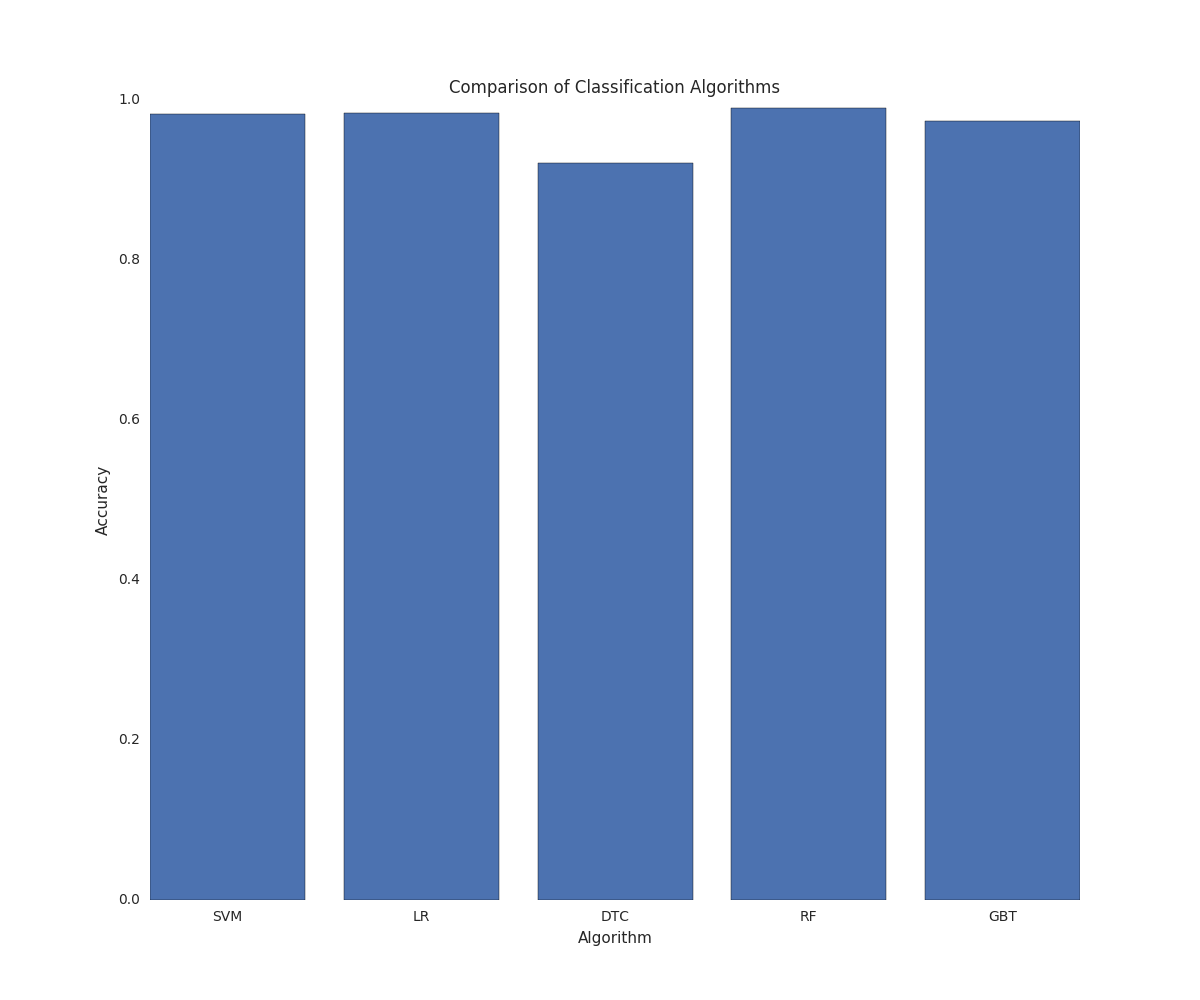

In [23]:
# Graph Visualization
pos = np.arange(len(names))
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(pos, names)
plt.bar(pos, acc_scores, align = 'center')
display()

In [24]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Build the Model
lsvc = LinearSVC(maxIter=10, regParam=0.1)
evaluator = BinaryClassificationEvaluator()

# Create the pipeline
pipeline = Pipeline(stages=[lsvc])

# Cross Validate the data and get the best model
paramGrid = ParamGridBuilder().build()


crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=10)

# Use the best model for predictions
cv_model = crossval.fit(train)
bestModel = cv_model.bestModel
predictions = bestModel.transform(test)
error= evaluator.evaluate(predictions)
print(str(error))


0.9896929824561403

In [25]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Use BinaryClassificationEvaluator to evaluate our model
evaluatorPR = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderPR")
evaluatorAUC = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderROC")

# Build the best model (training and test datasets)
train_pred = cv_model.transform(train)
test_pred = cv_model.transform(test)

# Evaluate the model on training datasets
pr_train = evaluatorPR.evaluate(train_pred)
auc_train = evaluatorAUC.evaluate(train_pred)

# Evaluate the model on test datasets
pr_test = evaluatorPR.evaluate(test_pred)
auc_test = evaluatorAUC.evaluate(test_pred)

# Print out the PR and AUC values
print("PR train: {:2f}".format(pr_train))
print("AUC train: {:2f}".format(pr_test))
print("PR test: {:2f}".format(auc_train))
print("AUC test: {:2f}".format(auc_test))


PR train: 0.962328
AUC train: 0.960542
PR test: 0.928001
AUC test: 0.937445

In [26]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorIndexer

# Build the Model
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Create the Pipeline
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(train)
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(train)
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model
model = pipeline.fit(train)

# Display Decision Tree
display(model.stages[-1])

treeNode
"{""index"":11,""featureType"":""continuous"",""prediction"":null,""threshold"":-1.95387965919759,""categories"":null,""feature"":14,""overflow"":false}"
"{""index"":9,""featureType"":""continuous"",""prediction"":null,""threshold"":0.0494552056983798,""categories"":null,""feature"":3,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":-3.515488315853755,""categories"":null,""feature"":14,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":1.3606900339616148,""categories"":null,""feature"":18,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":-0.8559933672199296,""categories"":null,""feature"":22,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":7,""featureType"":""continuous"",""prediction"":null,""threshold"":0.9036152142443374,""categories"":null,""feature"":4,""overflow"":false}"
"{""index"":6,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"


In [27]:
import numpy as np
import pandas as pd
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer

# Create a random forest pipeline

rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])
 
# Train model
model = pipeline.fit(train)

# Function to create feature importance dataframe
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

# Store feature importance dataframe
scores = ExtractFeatureImp(model.stages[-2].featureImportances, train, "features")

# Create a table for SQL usage
spark_df = sqlContext.createDataFrame(scores)
spark_df.createOrReplaceTempView("scores")
display(scores)

idx,name,score
14,V14,0.18551738438340398
10,V10,0.18275439030138757
4,V4,0.15218843637363183
7,V7,0.1129348616763514
11,V11,0.08570625786273275
12,V12,0.05842671852457639
17,V17,0.050999602615217056
16,V16,0.04083125945108263
2,V2,0.026571861600878606
3,V3,0.020376225881357703
